# OpenCV

## 安装

```shell
pip install opencv-python
```

## 导入

In [23]:
import cv2
import matplotlib.pyplot as plt

## 读取图像

```python
def imread(
    filename: str,
    flags: int
) -> MatLike | None: ...

def imread(
    filename: str,
    dst: MatLike | None,
    flags: int
) -> MatLike | None: ...
```

- `filename` 图像文件名
- `dst` 输出图像，不常用
- `flags` 枚举 `ImreadModes`，默认 `cv2.IMREAD_COLOR_BGR`

| 枚举值                       | 描述                                                                |
| ---------------------------- | ------------------------------------------------------------------- |
| `IMREAD_UNCHANGED`           | 返回加载的图像本身（包括 alpha 通道），忽略 EXIF 的方向             |
| `IMREAD_GRAYSCALE`           | 将图像转换为单通道灰度图像                                          |
| `IMREAD_COLOR_BGR`           | 将图像转换为 3 通道 BGR 彩色图像                                    |
| `IMREAD_COLOR`               | 同上                                                                |
| `IMREAD_ANYDEPTH`            | 当输入具有相应的深度时返回 16-bit/32-bit 图像，否则将其转换为 8-bit |
| `IMREAD_ANYCOLOR`            | 将读取图像以任何可能的颜色格式                                      |
| `IMREAD_LOAD_GDAL`           | 使用 gdal 驱动程序加载图像                                          |
| `IMREAD_REDUCED_GRAYSCALE_2` | 将图像转换为单通道灰度图像，并将图像大小缩小为 1/2                  |
| `IMREAD_REDUCED_COLOR_2`     | 将图像转换为 3 通道 BGR 彩色图像，并将图像大小缩小为 1/2            |
| `IMREAD_REDUCED_GRAYSCALE_4` | 将图像转换为单通道灰度图像，并将图像大小缩小为 1/4                  |
| `IMREAD_REDUCED_COLOR_4`     | 将图像转换为 3 通道 BGR 彩色图像，并将图像大小缩小为 1/4            |
| `IMREAD_REDUCED_GRAYSCALE_8` | 将图像转换为单通道灰度图像，并将图像大小缩小为 1/8                  |
| `IMREAD_REDUCED_COLOR_8`     | 将图像转换为 3 通道 BGR 彩色图像，并将图像大小缩小为 1/8            |
| `IMREAD_IGNORE_ORIENTATION`  | 不根据 EXIF 的方向标志旋转图像                                      |
| `IMREAD_COLOR_RGB`           | 将图像转换为 3 通道 RGB 彩色图像                                    |

支持的图像格式：

- Windows bitmaps - `*.bmp`, `*.dib`
- GIF files - `*.gif`
- JPEG files - `*.jpeg`, `*.jpg`, `*.jpe`
- JPEG 2000 files - `*.jp2`
- Portable Network Graphics - `*.png`
- WebP - `*.webp`
- AVIF - `*.avif`
- Portable image format - `*.pbm`, `*.pgm`, `*.ppm`, `*.pxm`, `*.pnm`
- PFM files - `*.pfm`
- Sun rasters - `*.sr`, `*.ras`
- TIFF files - `*.tiff`, `*.tif`
- OpenEXR Image files - `*.exr`
- Radiance HDR - `*.hdr`, `*.pic`
- Raster and Vector geospatial data supported by GDAL


In [24]:
image = cv2.imread("./Assets/test.jpg")
image.shape

(682, 1024, 3)

## 显示图片

```python
def imshow(winname: str, mat: MatLike) -> None: ...
```

- `winname` 窗口名称
- `mat` 要显示的图像

```python
def waitKey(delay: int) -> int: ...
```

返回键盘输入的 ASCII 码

- `delay` 等待时间，单位为毫秒，默认为 0，表示无限等待

```python
def destroyAllWindows() -> None: ...
```

In [25]:
cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 读取视频

```python
class VideoCapture(): ...
class VideoCapture(filename, apiPreference): ...
class VideoCapture(filename, apiPreference, params): ...
class VideoCapture(index, apiPreference): ...
class VideoCapture(index, apiPreference, params): ...
class VideoCapture(source, apiPreference, params): ...
```

- `filename` 视频文件名，可以是：
  - 视频文件名（例如 `video.mp4`）
  - 图像序列（例如 `img_%02d.jpg`，将读取样本如 `img_00.jpg`、`img_01.jpg`、`img_02.jpg` 等）
  - 视频流URL（例如 `protocol://host:port/script_name?script_params|auth`）
- `index` 用于打开视频捕捉设备的标识符，若要使用默认后端打开默认相机，只需传递 0 即可。
- `source` 数据流
- `apiPreference` 优先使用的 Capture API 后端，参见 [VideoCaptureAPIs](https://docs.opencv.org/4.x/d4/d15/group__videoio__flags__base.html#ga023786be1ee68a9105bf2e48c700294d)
- `params` 参见 [VideoCaptureProperties](https://docs.opencv.org/4.x/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d)

```python
# VideoCapture.get
def get(propId: int) -> float: ...
```

返回指定属性的值，当查询不支持的属性时，将返回 0

- `propId` 查询的属性，参见 [VideoCaptureProperties](https://docs.opencv.org/4.x/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d)

In [26]:
video = cv2.VideoCapture("./Assets/Cars.mp4")
if not video.isOpened():
    raise Exception("Video not opened")
video.get(cv2.CAP_PROP_FPS), video.get(cv2.CAP_PROP_FRAME_COUNT)

(25.011331420641746, 755.0)

## 显示视频

In [27]:
while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break
    cv2.imshow("video", frame)
    if cv2.waitKey(20) == ord("q"):
        break
video.release()
cv2.destroyAllWindows()

## 调整图像大小

```python
def resize(
    src: MatLike,
    dsize: Size | None,
    dst: MatLike | None,
    fx: float,
    fy: float,
    interpolation: int
) -> MatLike
```

- `src` 输入图像
- `dsize` 目标图像大小，若为 `None`，则根据 `fx` 和 `fy` 计算目标图像大小
- `dst` 目标图像数组
- `fx` 水平方向缩放因子
- `fy` 垂直方向缩放因子
- `interpolation` 插值方法，参见 [InterpolationFlags](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121)

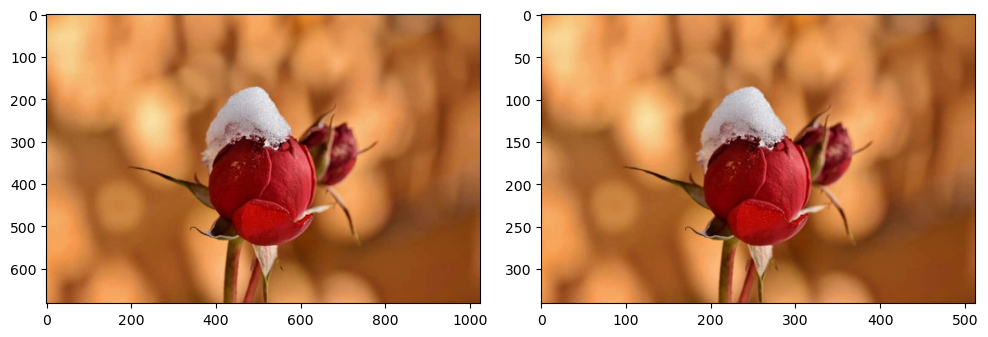

In [28]:
resized = cv2.resize(image, None, fx=0.5, fy=0.5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image[:, :, ::-1])
plt.subplot(1, 2, 2)
plt.imshow(resized[:, :, ::-1])
plt.tight_layout()
plt.show()

## 截取图像区域

称为 ROI（Region of Interest，感兴趣区域）

使用 NumPy 的数组切片语法即可

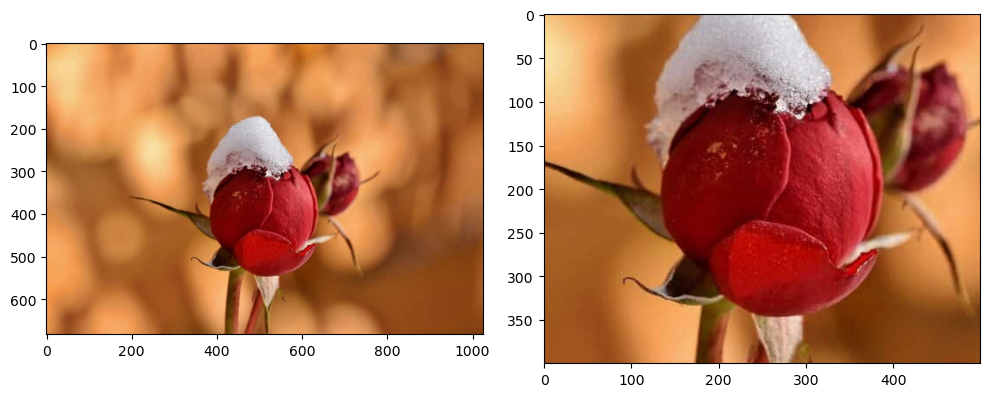

In [29]:
roi = image[200:600, 250:750]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image[:, :, ::-1])
plt.subplot(1, 2, 2)
plt.imshow(roi[:, :, ::-1])
plt.tight_layout()
plt.show()

## 旋转图像

```python
def rotate(
    src: MatLike, 
    rotateCode: int,
    dst: MatLike | None
) -> MatLike
```

将图像数组按 90 度的整数倍旋转

- `src` 输入图像
- `rotateCode` 旋转角度，枚举 `RotateFlags`
- `dst` 输出图像

| 枚举值                       | 描述              |
| ---------------------------- | ----------------- |
| `ROTATE_90_CLOCKWISE`        | 顺时针旋转 90 度  |
| `ROTATE_180`                 | 顺时针旋转 180 度 |
| `ROTATE_90_COUNTERCLOCKWISE` | 顺时针旋转 270 度 |

```python
def getRotationMatrix2D(
    center: Point2f,
    angle: float,
    scale: float
) -> MatLike
```

计算二维旋转的仿射矩阵

- `center` 旋转中心
- `angle` 旋转角度，单位为度，正值表示逆时针旋转
- `scale` 缩放因子

```python
def warpAffine(
    src: MatLike,
    M: MatLike,
    dsize: Size,
    dst: MatLike | None,
    flags: int,
    borderMode: int,
    borderValue: Scalar
) -> MatLike: ...
```

对图像应用仿射变换

- `src` 输入图像
- `M` 变换矩阵
- `dsize` 输出图像大小
- `dst` 输出图像
- `flags` 插值方法，参见 [InterpolationFlags](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121)
- `borderMode` 像素外推方法，参见 [BorderTypes](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)
- `borderValue` 在边界为常数的情况下使用的值，默认值为0

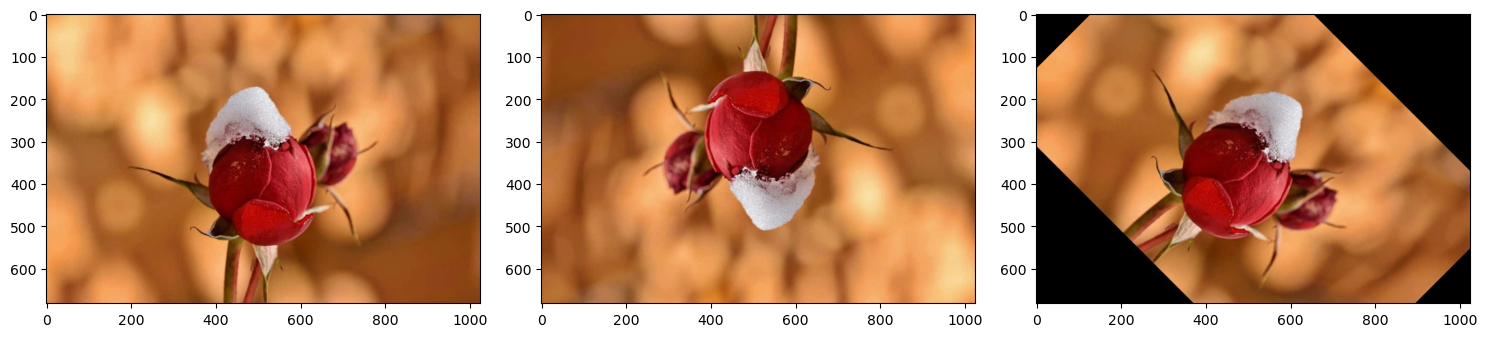

In [30]:
rotated_img1 = cv2.rotate(image, cv2.ROTATE_180)
height, width = image.shape[:2]
center = (width / 2, height / 2)
rotate_matrix = cv2.getRotationMatrix2D(center, -45, 1)
rotated_img2 = cv2.warpAffine(image, rotate_matrix, (width, height))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image[:, :, ::-1])
plt.subplot(1, 3, 2)
plt.imshow(rotated_img1[:, :, ::-1])
plt.subplot(1, 3, 3)
plt.imshow(rotated_img2[:, :, ::-1])
plt.tight_layout()
plt.show()

## 标注图像

```python


## 颜色空间